# Import required libraries

In [1]:
!pip install catboost==1.0.1

     |████████████████████████████████| 76.3 MB 34.7 MB/s 
     |████████████████████████████████| 46 kB 6.3 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas
import numpy as np

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

#plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

## Loading data

In [3]:

data_test = pandas.read_csv('evaluation.csv')
data_training = pandas.read_csv('data.csv')

## Obtaining of the basic information about data

In [4]:
data_test.head(1)

,ID,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,1000,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C7,S,"Youngstown, OH"


In [5]:
data_training.head()

,ID,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
0,0,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S,NaN
1,1,1,3,"Dahl, Mr. Karl Edwart",male,45.0,0,0,7598,8.0500,NaN,S,"Australia Fingal, ND"
2,2,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,S,Belfast
3,3,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,NaN
4,4,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,"New York, NY"


In [6]:
data_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   survived   1000 non-null   int64  
 2   pclass     1000 non-null   int64  
 3   name       1000 non-null   object 
 4   sex        1000 non-null   object 
 5   age        797 non-null    float64
 6   sibsp      1000 non-null   int64  
 7   parch      1000 non-null   int64  
 8   ticket     1000 non-null   object 
 9   fare       999 non-null    float64
 10  cabin      222 non-null    object 
 11  embarked   999 non-null    object 
 12  home.dest  573 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


### In the "age", "home.dest" columns
and "cabin" are gaps.
The Columns of type object to cast to int or float
The "Age" column is of type float, you must cast it to type int
There are categorical functions (like "Pclass") that need to be coded

In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         309 non-null    int64  
 1   pclass     309 non-null    int64  
 2   name       309 non-null    object 
 3   sex        309 non-null    object 
 4   age        249 non-null    float64
 5   sibsp      309 non-null    int64  
 6   parch      309 non-null    int64  
 7   ticket     309 non-null    object 
 8   fare       309 non-null    float64
 9   cabin      73 non-null     object 
 10  embarked   308 non-null    object 
 11  home.dest  172 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 29.1+ KB


### We can see above that the test data file also lacks values and incorrect data formats.

### Information about the values in our numeric columns

In [8]:
data_test.describe()

,ID,pclass,age,sibsp,parch,fare
count,309.000000,309.000000,249.000000,309.000000,309.000000,309.000000
mean,1154.000000,2.300971,29.479251,0.498382,0.388350,32.897708
std,89.344838,0.831619,14.976391,1.109652,0.840142,47.185050
min,1000.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,1077.000000,2.000000,20.000000,0.000000,0.000000,7.925000
50%,1154.000000,3.000000,28.000000,0.000000,0.000000,13.000000
75%,1231.000000,3.000000,39.000000,1.000000,0.000000,31.387500
max,1308.000000,3.000000,80.000000,8.000000,6.000000,263.000000


In [9]:
data_training.describe()

,ID,survived,pclass,age,sibsp,parch,fare
count,1000.000000,1000.000000,1000.000000,797.000000,1000.000000,1000.000000,999.000000
mean,499.500000,0.391000,2.293000,30.006692,0.499000,0.384000,33.418514
std,288.819436,0.488219,0.840153,14.240416,1.020314,0.873675,53.115334
min,0.000000,0.000000,1.000000,0.166700,0.000000,0.000000,0.000000
25%,249.750000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,499.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,749.250000,1.000000,3.000000,38.500000,1.000000,0.000000,31.275000
max,999.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### The only peculiarity of these distributions is that "age" is not an integer variable. It probably took into account the next months, but we don't care, so we'll need to change the data type.

It can also be seen that the functions have a completely different layout. For example, the Fare property has very high maximum values compared to other properties. This can negatively affect linear models, as they will give more weight to it. If we use linear models, we will need to normalize the data.

Let's check the balance of classes in the training sample.

### The function displays the number of unique values. By default, the function ignores Nans

In [10]:
data_training['survived'].value_counts()

0    609
1    391
Name: survived, dtype: int64

### 61% to 39% - quite good

In [11]:
display(data_test.nunique())

ID           309
pclass         3
name         309
sex            2
age           71
sibsp          7
parch          6
ticket       277
fare         156
cabin         66
embarked       3
home.dest    132
dtype: int64

In [12]:
display(data_training.nunique())

ID           1000
survived        2
pclass          3
name          999
sex             2
age            94
sibsp           7
parch           7
ticket        754
fare          249
cabin         156
embarked        3
home.dest     314
dtype: int64

### Number of missing values

In [13]:
data_training.isnull().sum(axis=0)

ID             0
survived       0
pclass         0
name           0
sex            0
age          203
sibsp          0
parch          0
ticket         0
fare           1
cabin        778
embarked       1
home.dest    427
dtype: int64

In [14]:
data_test.isnull().sum(axis=0)

ID             0
pclass         0
name           0
sex            0
age           60
sibsp          0
parch          0
ticket         0
fare           0
cabin        236
embarked       1
home.dest    137
dtype: int64

### Split data

In [15]:
Xdata = data_training.iloc[:,:1]
Ydata = data_training.iloc[:,1]

### 1st attempt, error data types

In [16]:
# dt.fit(Xdata, Ydata)

### I'll find out the data types

In [17]:
display(data_training.dtypes)

ID             int64
survived       int64
pclass         int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
home.dest     object
dtype: object

In [18]:
display(data_test.dtypes)

ID             int64
pclass         int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
home.dest     object
dtype: object

### I am looking for a number of unique values, the number of which is relatively small for conversion to numerical values

In [19]:
display(data_training.nunique())

ID           1000
survived        2
pclass          3
name          999
sex             2
age            94
sibsp           7
parch           7
ticket        754
fare          249
cabin         156
embarked        3
home.dest     314
dtype: int64

In [20]:
display(data_test.nunique())

ID           309
pclass         3
name         309
sex            2
age           71
sibsp          7
parch          6
ticket       277
fare         156
cabin         66
embarked       3
home.dest    132
dtype: int64

### The columns named "name", "home.dest", "cabin" and "Ticket number" are likely to have little effect on the usefulness of passenger survival training data.


In [21]:
data_training['ticket'].value_counts()

CA. 2343              8
347082                7
1601                  7
113781                6
347077                6
                     ..
SOTON/O.Q. 3101307    1
368323                1
STON/O 2. 3101273     1
28206                 1
349242                1
Name: ticket, Length: 754, dtype: int64

### We have 754 unique values in this column. There can be no addiction. We can safely delete this column. We'll check the cabin column.

In [22]:
data_training['cabin'].value_counts()

C23 C25 C27    5
B96 B98        4
F4             4
C78            4
C22 C26        4
              ..
B3             1
D15            1
B50            1
B4             1
A6             1
Name: cabin, Length: 156, dtype: int64

### 156 unique values. The column can be deleted.

### I'll get rid of some columns

In [23]:
data_training.drop(['name', 'cabin', 'ticket', 'home.dest'], inplace=True,axis=1 )
data_training.head(40)

,ID,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,1,3,male,27.0000,0,0,7.7958,S
1,1,1,3,male,45.0000,0,0,8.0500,S
2,2,0,2,male,NaN,0,0,0.0000,S
3,3,1,3,female,27.0000,0,2,11.1333,S
4,4,0,1,male,28.0000,1,0,82.1708,C
5,5,0,3,male,NaN,0,0,7.2292,C
6,6,0,1,male,47.0000,1,0,227.5250,C
7,7,1,2,male,8.0000,0,2,32.5000,S
8,8,1,1,female,49.0000,1,0,76.7292,C
9,9,1,2,female,19.0000,1,0,26.0000,S


In [24]:
data_test.drop(['name', 'cabin', 'ticket','home.dest'], inplace=True,axis=1 )
data_test.head()

,ID,pclass,sex,age,sibsp,parch,fare,embarked
0,1000,1,female,31.0,0,2,164.8667,S
1,1001,1,female,32.0,0,0,76.2917,C
2,1002,1,female,35.0,1,0,53.1000,S
3,1003,3,male,21.0,0,0,7.7750,S
4,1004,3,male,NaN,0,0,7.7500,Q


### What columns do we change?

### Let's analyze the gaps. There are missing values in the "Age" column and two missing values in the column embarked. I suggest filling in the "age" column with a mean value.

In [25]:
data_training['age'] = data_training['age'].fillna(data_training['age'].median())
data_test['age'] = data_test['age'].fillna(data_test['age'].median())


### We will delete rows with spaces in the embarked column (there is only 1, our selection will not be affected). And fill the gap in the median value column in the test data set.

In [26]:
data_training = data_training.dropna().reset_index(drop=True)
data_training.info()
data_test = data_test.dropna().reset_index(drop=True)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        998 non-null    int64  
 1   survived  998 non-null    int64  
 2   pclass    998 non-null    int64  
 3   sex       998 non-null    object 
 4   age       998 non-null    float64
 5   sibsp     998 non-null    int64  
 6   parch     998 non-null    int64  
 7   fare      998 non-null    float64
 8   embarked  998 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 70.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        308 non-null    int64  
 1   pclass    308 non-null    int64  
 2   sex       308 non-null    object 
 3   age       308 non-null    float64
 4   sibsp     308 non-null    int64  
 5   parch     308 non-null

### Let's enter the data in the columns into the required formats.

In [27]:
data_training['age'] = data_training['age'].astype(int)
data_test['age'] = data_test['age'].astype(int)
data_training['fare'] = data_training['fare'].astype(int)
data_test['fare'] = data_test['fare'].astype(int)

In [28]:
data_training.info()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        998 non-null    int64 
 1   survived  998 non-null    int64 
 2   pclass    998 non-null    int64 
 3   sex       998 non-null    object
 4   age       998 non-null    int64 
 5   sibsp     998 non-null    int64 
 6   parch     998 non-null    int64 
 7   fare      998 non-null    int64 
 8   embarked  998 non-null    object
dtypes: int64(7), object(2)
memory usage: 70.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        308 non-null    int64 
 1   pclass    308 non-null    int64 
 2   sex       308 non-null    object
 3   age       308 non-null    int64 
 4   sibsp     308 non-null    int64 
 5   parch     308 non-null    int64 
 6   fare      308 

### We have the following goals for exploratory data analysis:

-Look at the dependence of the target variable on all properties (build a correlation matrix)
-remove elements with minimal correlation
-encode categorical features
-If necessary to normalize and balance features

### Let's start by examining the dependence of the target variable on all properties.

In [29]:
data_training.corr()

,ID,survived,pclass,age,sibsp,parch,fare
ID,1.000000,-0.030672,0.038410,-0.021673,0.000155,-0.032584,-0.022055
survived,-0.030672,1.000000,-0.304632,-0.032338,-0.022134,0.086802,0.240872
pclass,0.038410,-0.304632,1.000000,-0.366833,0.059076,0.026314,-0.546311
age,-0.021673,-0.032338,-0.366833,1.000000,-0.199098,-0.121501,0.176888
sibsp,0.000155,-0.022134,0.059076,-0.199098,1.000000,0.370726,0.140935
parch,-0.032584,0.086802,0.026314,-0.121501,0.370726,1.000000,0.200470
fare,-0.022055,0.240872,-0.546311,0.176888,0.140935,0.200470,1.000000


### It can now be seen from the correlation matrix that the greatest dependence of the target character is on the properties of "pclass" and "fare", if we do not take into account sex. And if it probably doesn't affect "home.dest", then gender quite does, because women took precedence over men when evacuating. Let's further verify this using histograms. Let's exclude the characteristic of passengers from the analysis, because it obviously could not affect the survival rate.

In [30]:
columns_list = data_training.columns
columns_list = columns_list[2:]
columns_list

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'], dtype='object')

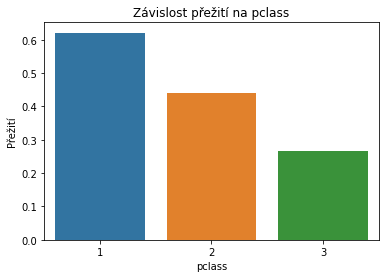

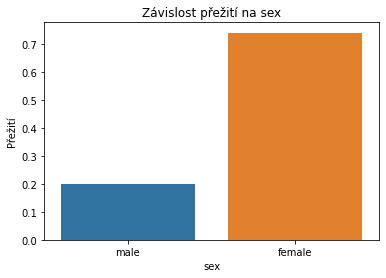

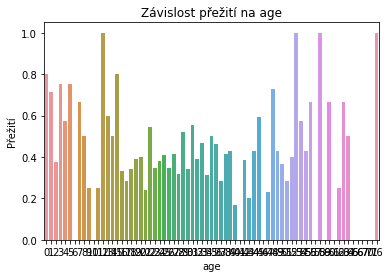

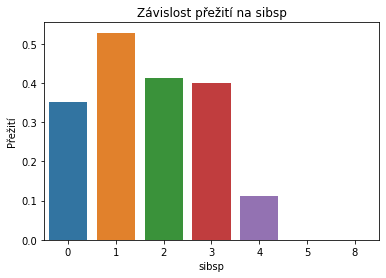

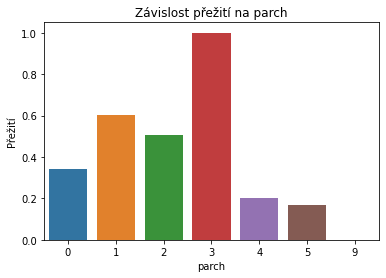

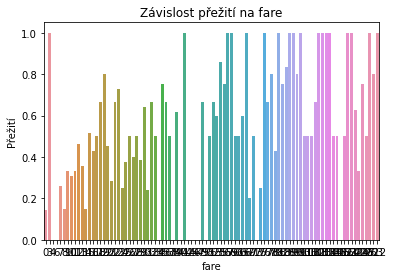

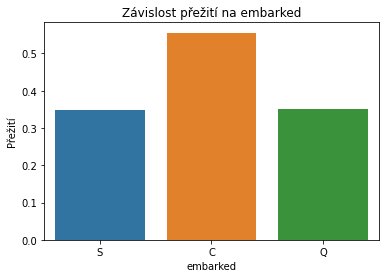

In [31]:
for column in columns_list:
  sns.barplot(x=data_training[column], y=data_training['survived'], ci=None)\
    .set(title='Závislost přežití na {}'.format(column), ylabel='Přežití')
  plt.show()

### The embarked tag has a clear effect on the target tag. We will not remove from the selection.
Our assumption that the sex of the passenger has a significant effect on the fact of survival has been confirmed.
The ticket class also had a significant effect on survival. The higher the class, the better the chances of survival.
From the above analysis, we can also conclude that our linear dependences are expressed very weakly. Accordingly, it can be assumed that linear models (such as logistic regression) will perform worse than wooden ones, etc.
We've come up with dependencies and correlations, now let's move on to coding functions. We need to encode gender and characters used. To do this, we use the get_dummies method.

In [32]:
training_dummy = pandas.get_dummies(data_training, prefix_sep='_', columns=['embarked', 'sex'], dtype=int)
test_dummy = pandas.get_dummies(data_test, prefix_sep='_', columns=['embarked', 'sex'], dtype=int)

In [33]:
training_dummy.info()
test_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ID          998 non-null    int64
 1   survived    998 non-null    int64
 2   pclass      998 non-null    int64
 3   age         998 non-null    int64
 4   sibsp       998 non-null    int64
 5   parch       998 non-null    int64
 6   fare        998 non-null    int64
 7   embarked_C  998 non-null    int64
 8   embarked_Q  998 non-null    int64
 9   embarked_S  998 non-null    int64
 10  sex_female  998 non-null    int64
 11  sex_male    998 non-null    int64
dtypes: int64(12)
memory usage: 93.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ID          308 non-null    int64
 1   pclass      308 non-null    int64
 2   age         308 non-null    int64
 3   sibs

### Let's continue to prepare data for the models.

### ID attribute must be removed

In [34]:
training_dummy = training_dummy.drop(['ID'], axis=1)
training_dummy

,survived,pclass,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,1,3,27,0,0,7,0,0,1,0,1
1,1,3,45,0,0,8,0,0,1,0,1
2,0,2,28,0,0,0,0,0,1,0,1
3,1,3,27,0,2,11,0,0,1,1,0
4,0,1,28,1,0,82,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
993,1,1,22,0,0,151,0,0,1,1,0
994,0,2,21,0,0,73,0,0,1,0,1
995,1,1,24,0,0,69,1,0,0,1,0
996,0,3,28,8,2,69,0,0,1,0,1


In [35]:
test_dummy = test_dummy.drop(['ID'], axis=1)
test_dummy

,pclass,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,1,31,0,2,164,0,0,1,1,0
1,1,32,0,0,76,1,0,0,1,0
2,1,35,1,0,53,0,0,1,1,0
3,3,21,0,0,7,0,0,1,0,1
4,3,28,0,0,7,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
303,1,16,0,1,39,0,0,1,1,0
304,3,28,0,0,7,0,0,1,0,1
305,3,27,0,0,8,0,0,1,0,1
306,3,14,5,2,46,0,0,1,0,1


### I will divide the data into testing and validation

In [36]:
dt = DecisionTreeClassifier(max_depth=10)

# matice priznaku
Xdata = training_dummy.drop(columns='survived')
# vektor vysvetlovane promene
Ydata = training_dummy['survived']

In [37]:
Xdata, Xval, Ydata, yval = train_test_split(Xdata, Ydata, test_size=0.25, random_state=15)
print('nove trenovaci jsou')
display(Xdata.shape)
display(Ydata.shape)
print('validacni jsou')
display(Xval.shape)
display(yval.shape)

nove trenovaci jsou


(748, 10)

(748,)

validacni jsou


(250, 10)

(250,)

In [38]:
dt.fit(Xdata, Ydata)

DecisionTreeClassifier(max_depth=10)

In [39]:
Y_predicted = dt.predict(Xdata)
Y_predicted

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,

### Accuracy in depth 10 on training data 91.3%

In [40]:
(Ydata - Y_predicted).value_counts(normalize=True)

 0    0.911765
 1    0.070856
-1    0.017380
Name: survived, dtype: float64

In [41]:
print('presnost(trenovaci data): {0:.6f}'.format(metrics.accuracy_score(Ydata, dt.predict(Xdata))))

presnost(trenovaci data): 0.911765


In [42]:
print('presnost(testovaci): {0:.6f}'.format(metrics.accuracy_score(yval, dt.predict(Xval))))

presnost(testovaci): 0.736000


## The difference in accuracy between the data is too large

## Let's try to calibrate the values of the depth hyperparameter

In [43]:
val_presnost = []
trenovaci_presnost = []
hloubka = range(1,101)
for depth in hloubka:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(Xdata, Ydata)
    trenovaci_presnost.append(metrics.accuracy_score(Ydata, dt.predict(Xdata)))
    val_presnost.append(metrics.accuracy_score(yval, dt.predict(Xval)))

<ipython-input-44-55f939503aa0>:6: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('trenovaci', 'validacni')
<ipython-input-44-55f939503aa0>:6: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('trenovaci', 'validacni')
<ipython-input-44-55f939503aa0>:6: UserWarning: Legend does not support 'e' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('trenovaci', 'validacni')
<ipython-input-44-55f939503aa0>:6: UserWarning: Legend does not support 'n' instances.
A proxy artist may be used instead.
See: https://mat

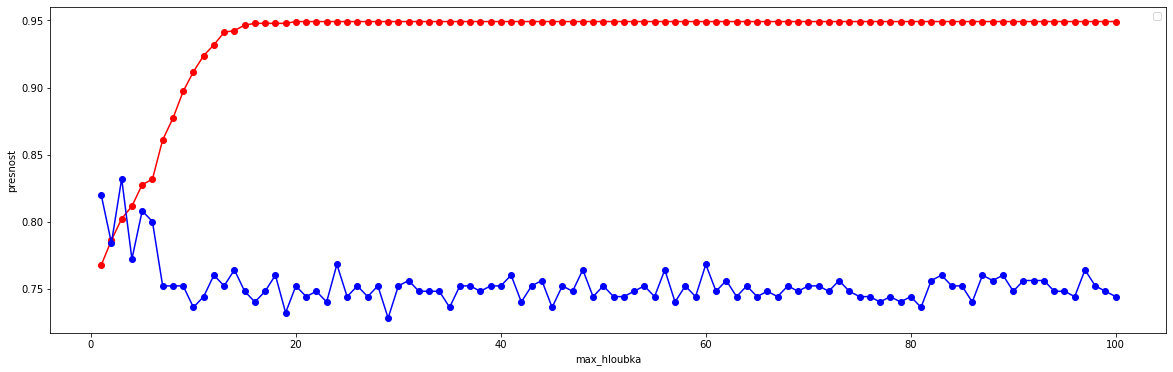

In [44]:
plt.figure(figsize=(20,6))
plt.plot(hloubka, trenovaci_presnost, 'or-')
plt.plot(hloubka, val_presnost, 'ob-')
plt.xlabel('max_hloubka')
plt.ylabel('presnost')
plt.legend('trenovaci', 'validacni')


## Found optimal value for depth hyperparameter

In [45]:
optimal_hloubka = np.argmax(val_presnost) + 1
optimal_hloubka

3

In [46]:
dt = DecisionTreeClassifier(max_depth=optimal_hloubka)
dt.fit(Xdata, Ydata)
print('presnost(trenovaci data): {0:.6f}'.format(metrics.accuracy_score(Ydata, dt.predict(Xdata))))

presnost(trenovaci data): 0.802139


## Accuracy increased to 80.2%

In [47]:
# matice priznaku
X_test = test_dummy
# vektor vysvetlovane promene
Ydata_test = training_dummy['survived']


# We test different models

# CatBoostClassifier

In [48]:
param_grid = {'depth': range(2, 16, 1), 'iterations': range(10, 130, 10)}
gs = GridSearchCV(CatBoostClassifier(random_state=12), param_grid=param_grid, return_train_score=True, n_jobs=4, scoring='accuracy')

In [49]:
%%time
gs.fit(Xdata, Ydata)

Learning rate set to 0.226762
0:	learn: 0.6378116	total: 82.8ms	remaining: 2.4s
1:	learn: 0.6001964	total: 108ms	remaining: 1.51s
2:	learn: 0.5589663	total: 109ms	remaining: 984ms
3:	learn: 0.5335652	total: 132ms	remaining: 860ms
4:	learn: 0.5069359	total: 133ms	remaining: 664ms
5:	learn: 0.4899702	total: 134ms	remaining: 535ms
6:	learn: 0.4745452	total: 134ms	remaining: 441ms
7:	learn: 0.4635007	total: 139ms	remaining: 382ms
8:	learn: 0.4559784	total: 174ms	remaining: 406ms
9:	learn: 0.4484975	total: 197ms	remaining: 394ms
10:	learn: 0.4405027	total: 198ms	remaining: 342ms
11:	learn: 0.4332962	total: 200ms	remaining: 300ms
12:	learn: 0.4281937	total: 227ms	remaining: 297ms
13:	learn: 0.4227936	total: 227ms	remaining: 260ms
14:	learn: 0.4170468	total: 250ms	remaining: 250ms
15:	learn: 0.4119393	total: 286ms	remaining: 250ms
16:	learn: 0.4082991	total: 287ms	remaining: 219ms
17:	learn: 0.4043928	total: 318ms	remaining: 212ms
18:	learn: 0.4007197	total: 326ms	remaining: 188ms
19:	learn: 

GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x7fe4f90eb0a0>,
             n_jobs=4,
             param_grid={'depth': range(2, 16),
                         'iterations': range(10, 130, 10)},
             return_train_score=True, scoring='accuracy')

In [50]:
gs.best_params_

{'depth': 12, 'iterations': 30}

In [51]:
gs.best_score_

0.7941565995525727

# RandomForestClassifier

In [52]:
param_grid = {'max_depth': range(2, 16, 1), 'n_estimators': range(10, 100, 10)}
gs = GridSearchCV(RandomForestClassifier(random_state=12, class_weight='balanced'), param_grid=param_grid, return_train_score=True, n_jobs=4, scoring='accuracy')

In [53]:
%%time
gs.fit(Xdata, Ydata)

CPU times: user 1.74 s, sys: 138 ms, total: 1.88 s
Wall time: 2min 35s


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=12),
             n_jobs=4,
             param_grid={'max_depth': range(2, 16),
                         'n_estimators': range(10, 100, 10)},
             return_train_score=True, scoring='accuracy')

In [54]:
gs.best_params_

{'max_depth': 7, 'n_estimators': 10}

In [55]:
gs.best_score_

0.8035346756152124

# ExtraTreesClassifier

In [56]:
param_grid = {'max_depth': range(2, 16, 1), 
              'n_estimators': range(10, 100, 10)}
gs = GridSearchCV(ExtraTreesClassifier(random_state=12), param_grid=param_grid, return_train_score=True, n_jobs=4, scoring='accuracy')

In [57]:
%%time
gs.fit(Xdata, Ydata)

CPU times: user 1.72 s, sys: 134 ms, total: 1.86 s
Wall time: 1min 58s


GridSearchCV(estimator=ExtraTreesClassifier(random_state=12), n_jobs=4,
             param_grid={'max_depth': range(2, 16),
                         'n_estimators': range(10, 100, 10)},
             return_train_score=True, scoring='accuracy')

In [58]:
gs.best_params_

{'max_depth': 12, 'n_estimators': 30}

In [59]:
gs.best_score_

0.7981834451901566

## The RandomForest model performed best on training data. We will use it to predict the test data.

In [60]:
model = RandomForestClassifier(random_state=12, class_weight='balanced', max_depth=7, n_estimators=90)
model.fit(Xdata, Ydata)
predicted_test = model.predict(X_test)

In [61]:
predicted_test = pandas.DataFrame(predicted_test)
X_test = pandas.DataFrame(X_test)

In [62]:
test_result = X_test.join(predicted_test, how='inner')

In [66]:
test_result

,pclass,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,0
0,1,31,0,2,164,0,0,1,1,0,1
1,1,32,0,0,76,1,0,0,1,0,1
2,1,35,1,0,53,0,0,1,1,0,1
3,3,21,0,0,7,0,0,1,0,1,0
4,3,28,0,0,7,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
303,1,16,0,1,39,0,0,1,1,0,1
304,3,28,0,0,7,0,0,1,0,1,0
305,3,27,0,0,8,0,0,1,0,1,0
306,3,14,5,2,46,0,0,1,0,1,0


In [64]:
X_test

,pclass,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,1,31,0,2,164,0,0,1,1,0
1,1,32,0,0,76,1,0,0,1,0
2,1,35,1,0,53,0,0,1,1,0
3,3,21,0,0,7,0,0,1,0,1
4,3,28,0,0,7,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
303,1,16,0,1,39,0,0,1,1,0
304,3,28,0,0,7,0,0,1,0,1
305,3,27,0,0,8,0,0,1,0,1
306,3,14,5,2,46,0,0,1,0,1


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1648dd68-2ddc-490b-9eab-28104cb11f27' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>